# Demo of `FastSampler` class

In [169]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
import time
from IPython.display import display

import numpy as np

from battleship.fast_sampler import FastSampler
from battleship.board import Board

In [171]:
SHIP_LENGTHS = range(2, 6)
SHIP_LABELS = ["R", "G", "P", "O"]

# Individual samples

## Starting from empty board

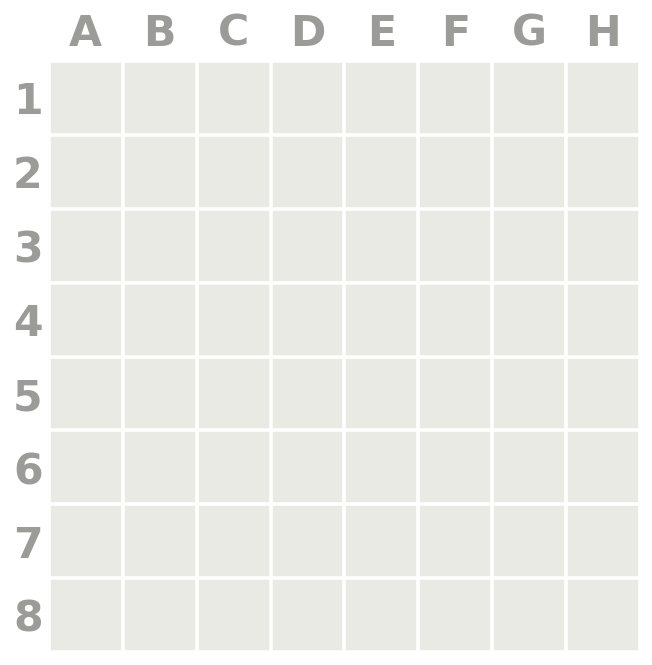

In [172]:
BOARD_EMPTY = Board(np.full((8, 8), -1))
BOARD_EMPTY

In [173]:
sampler = FastSampler(board=BOARD_EMPTY, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

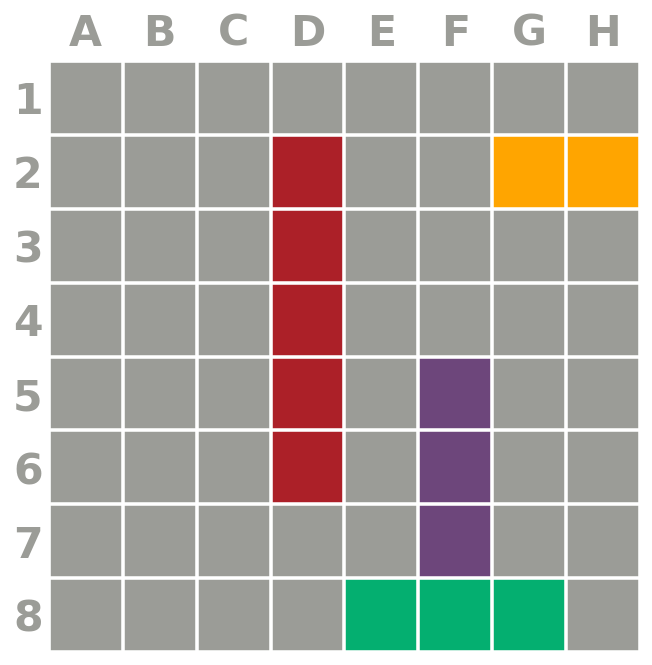

In [174]:
sampler.populate_board()

## Starting from board with some water tiles

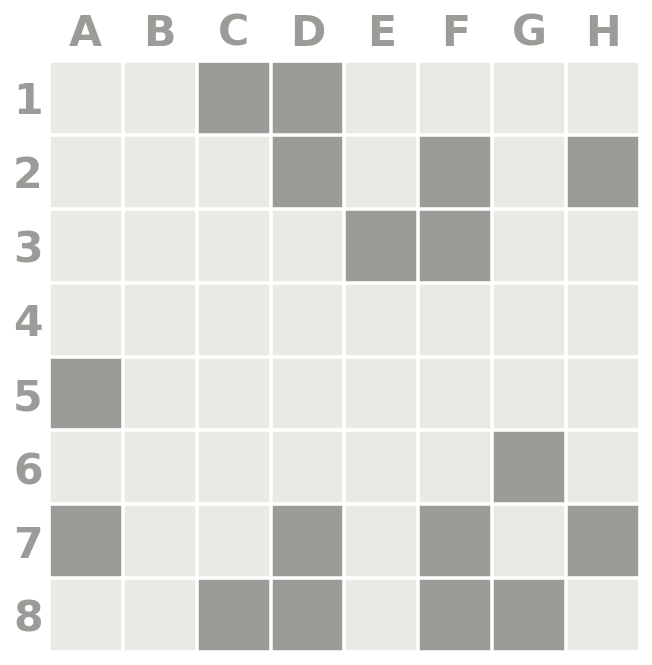

In [175]:
# Randomly set some tiles to 0
rng = np.random.default_rng(0)

SHIP_LENGTHS = range(2, 6)
BOARD_WATER = Board(rng.choice([0, -1], size=(8, 8), p=[0.25, 0.75]))
BOARD_WATER

In [176]:
sampler = FastSampler(board=BOARD_WATER, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

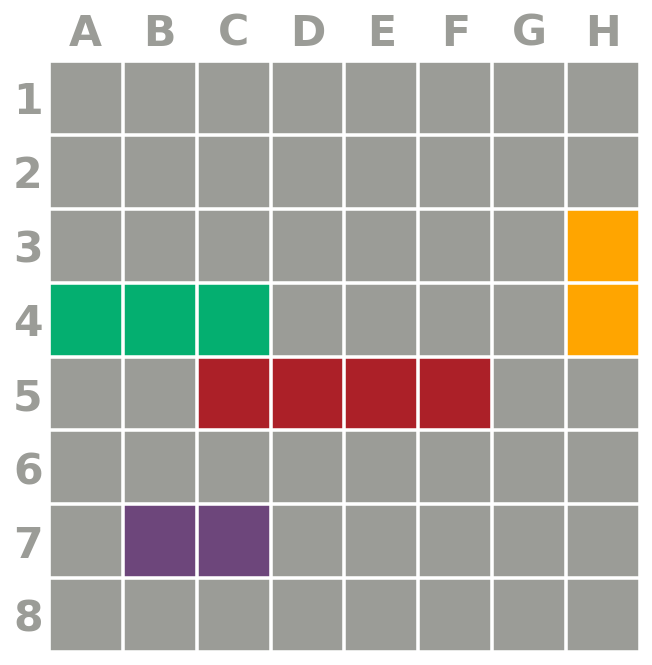

In [177]:
sampler.populate_board()

## Starting from board with some water tiles and ships

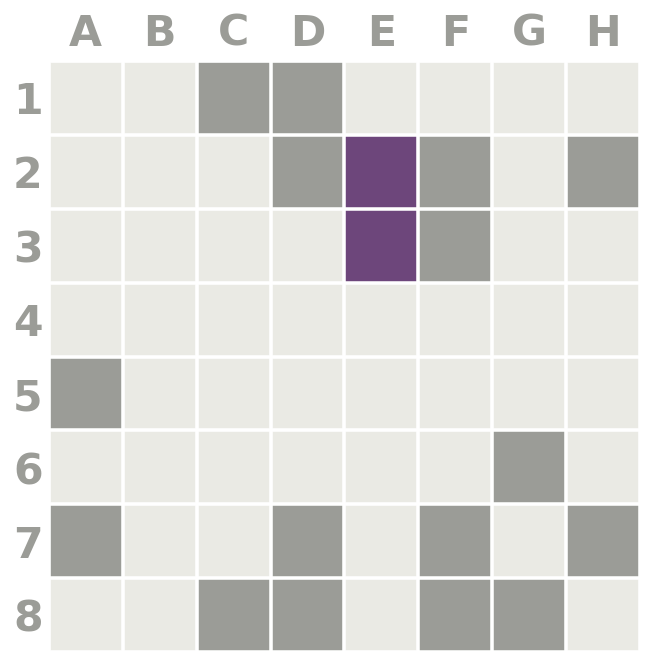

In [178]:
# Randomly set some tiles to 0
rng = np.random.default_rng(0)

SHIP_LENGTHS = range(2, 6)
BOARD_WATER_SHIP = Board(rng.choice([0, -1], size=(8, 8), p=[0.25, 0.75]))
BOARD_WATER_SHIP.board[1:3, 4] = 3
BOARD_WATER_SHIP

In [179]:
sampler = FastSampler(board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

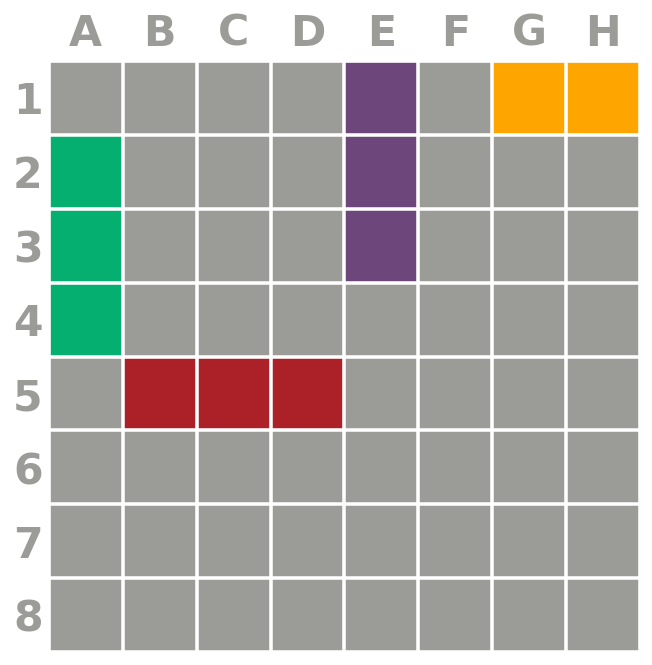

In [180]:
new_board = sampler.populate_board()
new_board

# Benchmarking

In [181]:
N = 10000
SHIP_LENGTHS = range(2, 6)

# sampler = FastSampler(board=BOARD_EMPTY, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)
# sampler = FastSampler(board=BOARD_WATER, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)
sampler = FastSampler(board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS)

start = time.time()

sampled_boards = []
for i in range(N):
    sampled_boards.append(sampler.populate_board())

print(f"Sampled {N} boards in {time.time() - start:.4f} seconds")
n_valid = len([b for b in sampled_boards if b is not None])
print(f"{n_valid} / {N} boards ({n_valid / N:.2f}%) are valid")

Sampled 10000 boards in 0.5330 seconds
10000 / 10000 boards (1.00%) are valid


In [182]:
(sampled_boards[0].board > 0).astype(int)

array([[0, 0, 0, 0, 1, 0, 1, 1],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

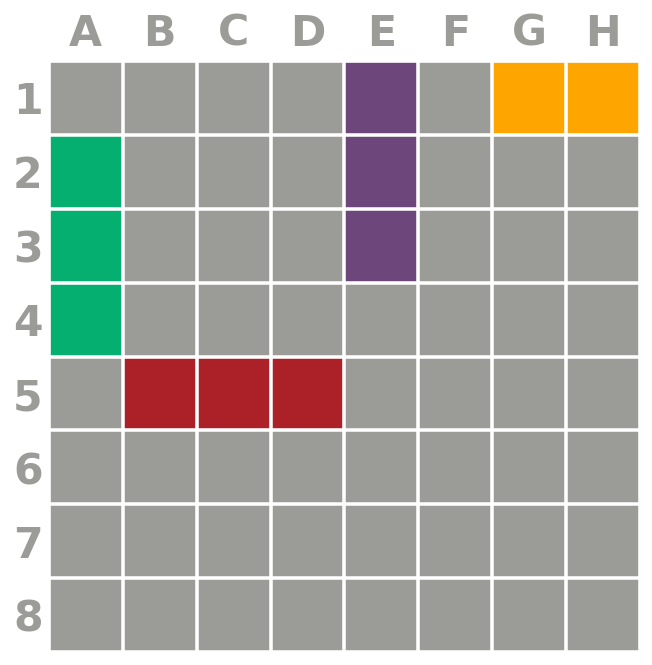

In [183]:
sampled_boards[0]

# Heatmaps

In [184]:
sampler = FastSampler(
    board=BOARD_WATER_SHIP, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS
)

posterior = sampler.compute_posterior(n_samples=1000)

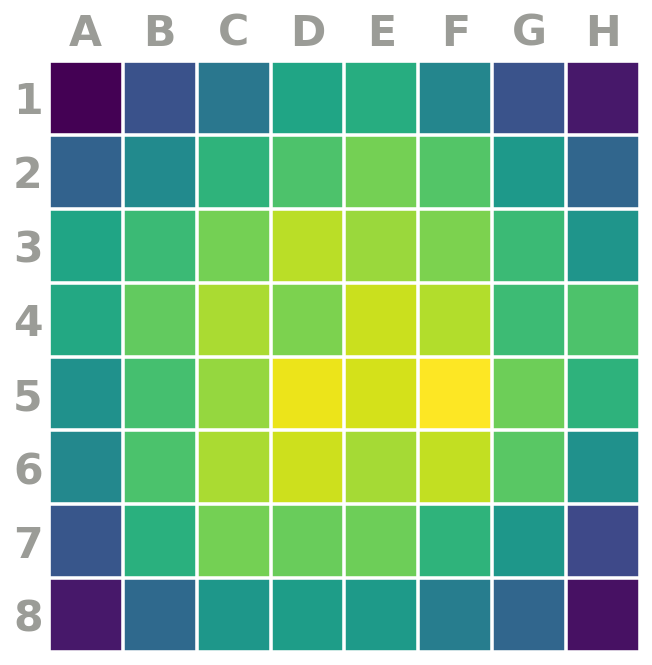

In [191]:
BOARD = BOARD_EMPTY
SHIP_LENGTHS = range(2, 6)
SHIP_LABELS = ["R", "G", "P", "O"]
# SHIP_LABELS = ["P", "G", "R", "O"]

sampler = FastSampler(
    board=BOARD, ship_lengths=SHIP_LENGTHS, ship_labels=SHIP_LABELS
)

sampler.heatmap(n_samples=1000)